# Chapter 2a: Probability Theory

In this notebook, we will first learn how to calculate common probability distributions in Python as well as various statistical measures. We will then learn how to sample data from given distributions. We will also start exploring the various plotting functions of Python.

Before digging into probability theory, let us import some important Python libraries (if you get the error "_No module named 'numpy'_", first install numpy via a terminal, with pip `python3 -m pip install numpy` or conda `conda install numpy -y` - same general strategy for any other missing library throughout the course).

In [6]:
# Import libraries
from math import factorial, sqrt, erf
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

## 1. Empirical probability distribution

Let us consider the Old Faithful geyser eruption dataset (Azzalini & Bowman, 1990), commonly used to illustrate clustering techniques (see future chapter 7). We will here use it to analyse empirical probability distributions.

### 1.1. The Old Faithful geyser eruption dataset

Discovered in 1870 by the Washburn Expedition, Old Faithful geyser was named for its frequent and somewhat predictable eruptions, which number more than a million since Yellowstone became the world’s first national park in 1872. The benchmark data set commonly used for Machine Learning consists of 272 pairs of measurements, referring to the time interval between the starts of successive eruptions $w$, and the duration of the subsequent eruption $d$.


First download `OldFaithful.dat` from Blackboard. Then load the file by running the following cell (you may need to update the path):

In [7]:
data_df = pd.read_fwf('C:\\Users\\79092\\Desktop\\地球科学与机器学习\\chapter2\\OldFaithful.dat')   # fwf for Fixed-Width Text File
data_df  # df for data frame

,ID,duration,waiting_time
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85
...,...,...,...
267,26,4.117,81
268,26,2.150,46
269,27,4.417,90
270,27,1.817,46


Now time to learn some basic `pandas` functions:

In [8]:
data_df.columns

Index(['ID', 'duration', 'waiting_time'], dtype='object')

In [9]:
x1 = data_df['duration'].values
x2 = data_df['waiting_time'].values

In [10]:
x1

array([3.6  , 1.8  , 3.333, 2.283, 4.533, 2.883, 4.7  , 3.6  , 1.95 ,
       4.35 , 1.833, 3.917, 4.2  , 1.75 , 4.7  , 2.167, 1.75 , 4.8  ,
       1.6  , 4.25 , 1.8  , 1.75 , 3.45 , 3.067, 4.533, 3.6  , 1.967,
       4.083, 3.85 , 4.433, 4.3  , 4.467, 3.367, 4.033, 3.833, 2.017,
       1.867, 4.833, 1.833, 4.783, 4.35 , 1.883, 4.567, 1.75 , 4.533,
       3.317, 3.833, 2.1  , 4.633, 2.   , 4.8  , 4.716, 1.833, 4.833,
       1.733, 4.883, 3.717, 1.667, 4.567, 4.317, 2.233, 4.5  , 1.75 ,
       4.8  , 1.817, 4.4  , 4.167, 4.7  , 2.067, 4.7  , 4.033, 1.967,
       4.5  , 4.   , 1.983, 5.067, 2.017, 4.567, 3.883, 3.6  , 4.133,
       4.333, 4.1  , 2.633, 4.067, 4.933, 3.95 , 4.517, 2.167, 4.   ,
       2.2  , 4.333, 1.867, 4.817, 1.833, 4.3  , 4.667, 3.75 , 1.867,
       4.9  , 2.483, 4.367, 2.1  , 4.5  , 4.05 , 1.867, 4.7  , 1.783,
       4.85 , 3.683, 4.733, 2.3  , 4.9  , 4.417, 1.7  , 4.633, 2.317,
       4.6  , 1.817, 4.417, 2.617, 4.067, 4.25 , 1.967, 4.6  , 3.767,
       1.917, 4.5  ,

We can now plot the histograms (first cell for one plot only, second cell for 2 subplots).

A histogram is a plot that involves first grouping the observations into bins and counting the number of events that fall into each bin. The counts in each bin are then plotted as a bar graph with the bins on the x-axis and the count on the y-axis.

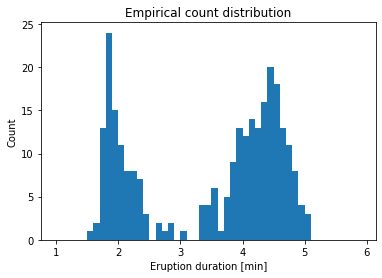

In [11]:
plt.hist(x1, bins = np.arange(1, 6, .1))
plt.xlabel('Eruption duration [min]')
plt.ylabel('Count')
plt.title('Empirical count distribution')
plt.show()    # or add `;` on previous line to avoid unnecessary text above the plot (test by yourself)

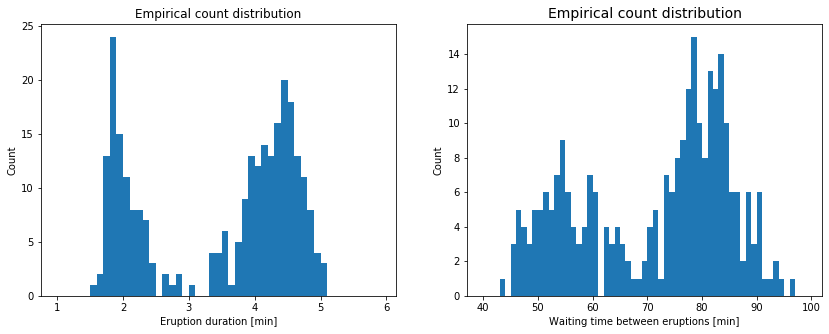

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].hist(x1, bins = np.arange(1, 6, .1))
ax[0].set_xlabel('Eruption duration [min]')
ax[0].set_ylabel('Count')
ax[0].set_title('Empirical count distribution')


ax[1].set_xlabel('Waiting time between eruptions [min]')
ax[1].set_ylabel('Count')
ax[1].set_title('Empirical count distribution', size=14);  # testing a different title size

In [13]:
ax[1]

### 1.2. The Old Faithful geyser probability distribution

There are two main types of probability distribution functions for empirical data; they are:
* **Probability Density Function** (PDF)
* **Cumulative Distribution Function** (CDF)

The PDF returns the expected probability for observing a value (for discrete data, the PDF is referred to as a Probability Mass Function, PMF). The CDF returns the expected probability for observing a value less than or equal to a given value.

An **empirical probability density function** can be fit using a kernel density estimation method. It can be approximated by a histogram although a specific bin size must then be assigned.

Fitting an **empirical cumulative distribution function** (ECDF) is more straightforward (no bin selection) and is done as follows: All of the unique observations in the data sample are first ordered and the cumulative probability is then calculated for each as the number of observations $x$ less than or equal to a given observation $x_i$ divided by the total number of observations $N$ ($ECDF(x_i) = \frac{n(x \le x_i)}{N}$).

In [14]:
from statsmodels.distributions.empirical_distribution import ECDF

In [15]:
ecdf = ECDF(x1)

The function can be called to calculate the cumulative probability for a given observation:

In [16]:
ecdf

In [17]:
# get cumulative probability for values
print('P(x < 3): %.3f' % ecdf(3))
print('P(x < 5): %.3f' % ecdf(5))

P(x < 3): 0.357
P(x < 5): 0.989


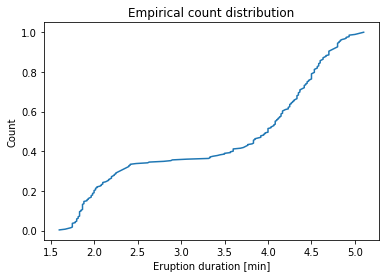

In [18]:
# plot the cdf
plt.plot(ecdf.x, ecdf.y)
plt.xlabel('Eruption duration [min]')
plt.ylabel('Count')
plt.title('Empirical count distribution');

In [19]:
ecdf.x

array([ -inf, 1.6  , 1.667, 1.7  , 1.733, 1.75 , 1.75 , 1.75 , 1.75 ,
       1.75 , 1.75 , 1.783, 1.783, 1.8  , 1.8  , 1.8  , 1.8  , 1.817,
       1.817, 1.817, 1.833, 1.833, 1.833, 1.833, 1.833, 1.833, 1.833,
       1.85 , 1.85 , 1.867, 1.867, 1.867, 1.867, 1.867, 1.867, 1.867,
       1.867, 1.883, 1.883, 1.883, 1.883, 1.917, 1.917, 1.933, 1.933,
       1.95 , 1.967, 1.967, 1.967, 1.983, 1.983, 1.983, 2.   , 2.   ,
       2.   , 2.   , 2.017, 2.017, 2.017, 2.033, 2.033, 2.067, 2.083,
       2.083, 2.1  , 2.1  , 2.1  , 2.133, 2.15 , 2.167, 2.167, 2.183,
       2.2  , 2.2  , 2.2  , 2.217, 2.233, 2.233, 2.25 , 2.25 , 2.267,
       2.283, 2.3  , 2.317, 2.333, 2.35 , 2.367, 2.383, 2.4  , 2.4  ,
       2.417, 2.417, 2.483, 2.617, 2.633, 2.8  , 2.883, 2.9  , 3.067,
       3.317, 3.333, 3.333, 3.367, 3.417, 3.45 , 3.5  , 3.5  , 3.567,
       3.567, 3.6  , 3.6  , 3.6  , 3.6  , 3.683, 3.717, 3.733, 3.75 ,
       3.767, 3.767, 3.817, 3.833, 3.833, 3.833, 3.833, 3.833, 3.85 ,
       3.85 , 3.883,

**EXERCISE 1:** Plot the approximated empirical PDF of $x_2$ with the same bining as above. First use `counts, bins = np.histogram(x, ...)` to get the count values, then turn the counts into probabilities (note that a sum can be done with `np.sum()`); finally plot the distribution using `plt.plot()` (you will notice that you need midpoints and not bins for the x-axis. To remove an element from a vector, use `x_new = np.delete(x, INDEX)`; Python indexing starts at 0 while R indexing starts at 1). _This simple exercise is to make you more familiar with Python._

In [20]:
# ax[1].hist(x2, bins = np.arange(40, 100, 1));
counts,bins = np.histogram(x2, bins = np. arange(40, 100, 1))
pr = counts/np.sum(counts)
x = np.delete(bins, 0)

In [21]:
bins

array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99])

Sum of probabilities: 1.00000
Sum of counts = sample size: 272 272


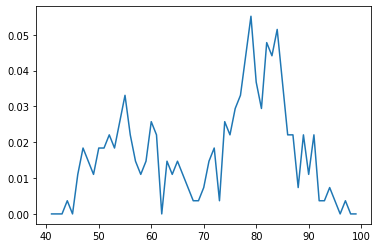

In [22]:
#YOUR CODE HERE
# counts, bins = ?
# pr = ?
# x = ?



plt.plot(x, pr)
print('Sum of probabilities: %.5f' % np.sum(pr))
print('Sum of counts = sample size:', np.sum(counts), len(x2))

Your result should be equivalent to using `density = True` in the histogram function:

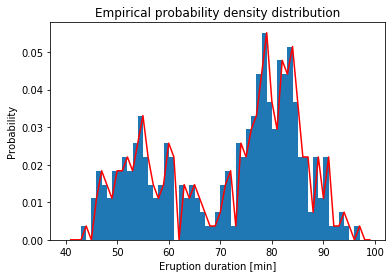

In [23]:
plt.hist(x2, bins = np.arange(40, 100, 1), density = True)
plt.plot(x, pr, c = 'red')
plt.xlabel('Eruption duration [min]')
plt.ylabel('Probability')
plt.title('Empirical probability density distribution');

Notice the high irregularities in the distribution. In that regard, the visual form of the CDF is more robust than that of the PDF against fluctuations due to finite sample size (see above). We can expect for instance that new data samples would alter the observed PDF.

For completeness, let us finally fit the empirical PDF using **kernel density estimation**. Its purpose is to make inferences about the population, based on a finite data sample.

In this method, a continuous curve (the kernel) is drawn at every individual data point and all of these curves are then added together to make a single smooth density estimation. The kernel most often used is a Gaussian (which produces a Gaussian bell curve at each data point - see section 2.3).

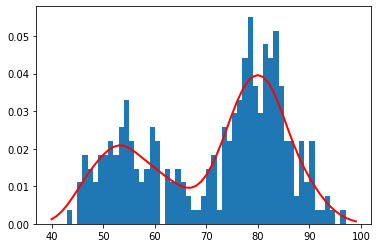

In [24]:
from sklearn.neighbors import KernelDensity

# fit density
model = KernelDensity(bandwidth = 3, kernel = 'gaussian')    # bandwidth = smoothing parameter
x2_2d = x2.reshape((len(x2), 1))                             # 2D array expected
model.fit(x2_2d)


# sample probabilities for a range of outcomes
values = np.asarray([value for value in range(40, 100)])     # loop example
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

# plot the histogram and pdf
plt.hist(x2, bins = np.arange(40, 100, 1), density = True)
plt.plot(values, probabilities, 'r', linewidth = 2);

Despite the assumptions made on the kernel and smoothing level, the fitted empirical PDF provides a reasonable model of the waiting time between eruptions ($x_2$). One could then simulate new data data points from the PDF (see section 3).

**EXERCISE 2:** Compute the 4 first moments of $x_2$ using `x.mean()`, `x.var()`, `stats.skew(x)` and `stats.kurtosis(x)`. Are the skewness and kurtosis values reasonable in view of the PDF?

In [25]:
mean_x2 = x2.mean()
variance_x2 = x2.var()
skewness_x2 = stats.skew(x2)
kurtosis_x2 = stats.kurtosis(x2)

In [26]:
stats.kurtosis?

In [27]:
#YOUR CODE HERE
#mean_x2 = ?
#variance_x2 = ?
#skewness_x2 = ?
#kurtosis_x2 = ?

print('Mean:', mean_x2)
print('Variance:', variance_x2)
print('Skewness:', skewness_x2)
print('Kurtosis:', kurtosis_x2)

Mean: 70.8970588235294
Variance: 184.14381487889273
Skewness: -0.41631877691001046
Kurtosis: -1.1426305634202936


_YOUR ANSWER HERE_

## 2. Common probability distributions

### 2.1. The Binomial distribution

The Binomial distribution is defined as:
$$
P(X=k) = {n \choose k} p^k (1-p)^{n-k}
$$
which is the probability of getting exactly $k$ successes in $n$ independent Bernoulli trials.

Let us first define this distribution manually, in a function:

In [28]:
def PMF_binomial(k,n,p):
    coeff_binomial = factorial(n) / (factorial(k) * factorial(n-k))
    Pr = coeff_binomial * pow(p,k) * pow((1-p),(n-k))
    return Pr

Suppose a biased coin comes up heads with probability $p=0.3$ when tossed. The probability of seeing exactly 4 heads in 6 tosses is

In [29]:
PMF_binomial(4,6,.3)

0.05953499999999999

Now, let us directly use the binomial PMF as defined in `scipy.stats`.

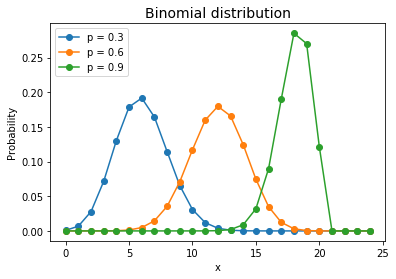

In [30]:
# pmf(random_variable, number_of_trials, probability)
n = 20
for p in [.3,.6,.9]:
    x = np.arange(0, 25)
    Pr_binom = stats.binom.pmf(x, n, p)
    plt.plot(x, Pr_binom, '-o', label="p = {:.1f}".format(p))
    plt.xlabel('x')
    plt.ylabel('Probability')
    plt.title('Binomial distribution', size = 14)
    plt.legend()

**EXERCISE 3:** Check that our function `PMF_binomial` is consistent with `stats.binom.pmf` by adding one estimate for a given $x$ on the orange curve.

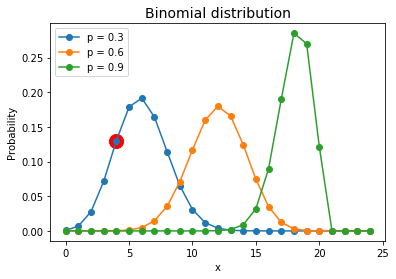

In [31]:
## YOUR CODE HERE
x0 = 4
p0 = PMF_binomial(x0,20,.3)


for p in [.3,.6,.9]:
    x = np.arange(0, 25)
    Pr_binom = stats.binom.pmf(x, n, p)
    plt.plot(x, Pr_binom, '-o', label="p = {:.1f}".format(p))
    plt.xlabel('x')
    plt.ylabel('Probability')
    plt.title('Binomial distribution', size = 14)
    plt.legend()
    
plt.scatter(x0, p0, s = 200, c = 'r');

### 2.2. The Poisson distribution

The Poisson distribution is defined as:
$$
P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!}
$$
which is a limiting case of the Binomial distribution, when the number of trials $n$ increases indefinitely while the rate $\lambda = np$ remains constant. 

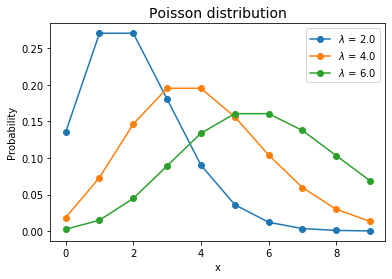

In [32]:
# n = number of events, lambd = expected number of events in considered period
for lambd in [2,4,6]:
    x = np.arange(0, 10)
    Pr_poisson = stats.poisson.pmf(x, lambd)
    plt.plot(x, Pr_poisson, '-o', label="$\lambda$ = {:.1f}".format(lambd))
    plt.xlabel('x')
    plt.ylabel('Probability')
    plt.title('Poisson distribution', size = 14)
    plt.legend()

### 2.3. The Normal distribution

The Normal distribution is defined as:
$$
N(\mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}
$$
which is an approximation of the Binomial distribution for large $n$.

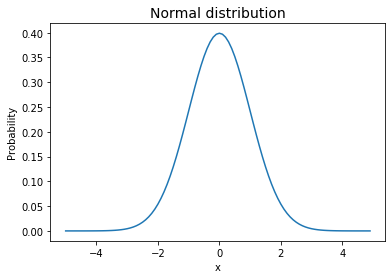

In [33]:
x = np.arange(-5, 5, .1)
mean, sigma = 0, 1
Pr_normal = stats.norm.pdf(x, mean, sigma)
plt.plot(x, Pr_normal)
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Normal distribution', size = 14);

**EXERCISE 4:** Check that the Normal distribution is a good approximation of the Binomial distribution for the conditions $np \ge 5$ and $n(1-p) \ge 5$. _We will also make a clear distinction between the discrete and continuous distributions when plotting._

In [37]:
n = 5
p = 0.5
mean = n*p
sigma = sqrt(n*p*(1-p))
Pr_binom =  stats.binom.pmf(x, n, p)
Pr_normal = stats.norm.pdf(x, mean, sigma)

n*p =  2.5
n*(1-p) =  2.5


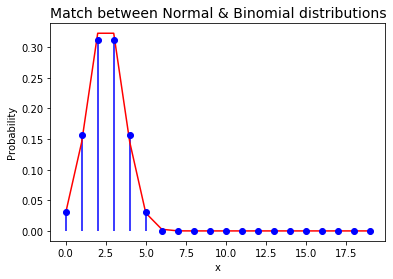

In [38]:
# YOUR CODE HERE
#n = ?
#p = ?
#mean = ?
#sigma = ?

print('n*p = ', n*p)
print('n*(1-p) = ', n*(1-p))

xbin = 1
x = np.arange(0, 20, xbin)
# YOUR CODE HERE
#Pr_binom = ?
#Pr_normal = ?

plt.plot(x, Pr_normal, 'r')
plt.plot(x, Pr_binom, 'bo')
plt.vlines(x, 0, Pr_binom, 'b')
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Match between Normal & Binomial distributions', size = 14);

The cumulative distribution function (CDF) of the Normal distribution is defined as:
$$
F(x) = \frac{1}{2} \left[ 1+ erf \left( \frac{x-\mu}{\sigma \sqrt{2}} \right) \right]
$$
with $erf$ the error function. Let us compare this formula to the cumulative version of the PDF. The latter approach can be used for any empirical probability distribution. _If there is a noticeable horizontal shift between the two curves, consider updating $n$ and/or $p$ to be much higher than the minimum threshold of 5 for the two previously defined conditions._

In [ ]:
CDF_normal = [.5 * (1 + erf((xi-mean)/(sigma*sqrt(2)))) for xi in x]

plt.plot(x, np.cumsum(Pr_normal) * xbin, 'b')
plt.plot(x, CDF_normal, 'r--')
plt.xlabel('x')
plt.ylabel('Cumulative probability')
plt.title('Normal CDF');

## 3. Sampling methods

### 3.1. Sampling from statistical distributions

One first approach, for the Binomial distribution, is simply to toss a coin which we will consider here to be fair with $p = 0.5$. We will run 1,000 simulations each with $n = 10$ trials.

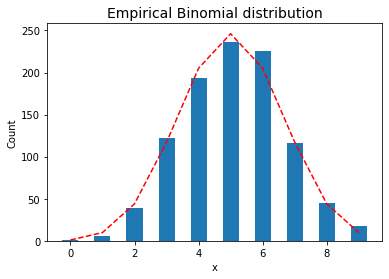

In [39]:
p, n, nsim = .5, 10, 1000

heads = []
for i in range(nsim):      # helper: list(range(x)) to explore the values taken by range(x)
    tosses = [np.random.random() for i in range(n)]
    heads.append(len([i for i in tosses if i <= p]))

plt.hist(heads, bins = np.arange(-.5, 10.5), rwidth = .5)
x = np.arange(0, 10)
plt.plot(x, stats.binom.pmf(x, n, p) * nsim, '--r')
plt.xlabel('x')
plt.ylabel('Count')
plt.title('Empirical Binomial distribution', size = 14);

In [ ]:
np.random.random?

We could directly use the `np.random.binomial` function instead. Let us also calculate the first 4 moments of the Binomial distribution. It should be noticed that $Mean = \mu = np$, $Var = \sigma^2 = npq$, $Skew = \frac{q-p}{\sqrt{npq}}$ and $Kurt = \frac{1-6pq}{npq}$

In [ ]:
p, n, nsim = .5, 10, 10000
heads = np.random.binomial(n, p, size = nsim)

print('Number of heads (i.e. successes) in 20 simulations:', heads[0:19])

# moments mean, var, skew, kurt
print('Moments (data):', [np.mean(heads), np.var(heads), stats.skew(heads), stats.kurtosis(heads)])

In [ ]:
q = 1-p
print('Moments (PDF):', [n*p, n*p*q, (q-p)/sqrt(n*p*q), (1-6*p*q)/(n*p*q)])

Measures of central tendency (other than the mean) are the **median** and the **mode**. Other measures of interest are **quantiles**. In Python, we use:

In [ ]:
[np.median(heads), stats.mode(heads).mode[0]]

In [ ]:
stats.mode?

In [ ]:
np.quantile(heads, [.01,.25,.5,.75,.99])

In [ ]:
np.quantil?

Similarly to the Binomial distribution, we can sample other distributions with:

`sample_poisson = np.random.poisson(lambd, nsim)`

`sample_normal = np.random.normal(mu, sigma, nsim)`

`sample_uniform = np.random.random(nsim)`

_etc._

### 3.2. Sampling from rate functions

We will program two different methods for 2 geo-science rate functions:
1. **Transformation method** to generate earthquake magnitudes $m$ from the Gutenberg-Richter law $f(m) = e^{-\beta m}$
2. **Thinning method** to generate accoustic emissions in a rock under stress from a time-to-failure power-law equation $n(t) = N_{max} (1 - t_f^{-m}(t_f-t)^m )$ (defined such that the rate $n(0) = 0$ and $n(t_f) = N_{max}$ with power exponent $m$).

#### 3.2.1. Transformation Method

The Gutenberg-Richter law expresses the relationship between the magnitude $m$ and total number of earthquakes $N$ in any given region and time period of at least that magnitude.

$$ N(m) \propto 10^{-bm} $$

This relationship was first proposed by Gutenberg & Richter (1944). It is the basic law used in seismic hazard & risk assessment to estimate probabilities of potentially damaging earthquakes.

<img src="figs_notebook/fig_SanAndreasFault.png" width = 500>

**EXERCISE 5:** Use the equation defined during the lecture (e.g., Clauset et al., 2009) to generate 10,000 earthquake magnitudes with minimum magnitude $m_{min} = 2$ and $b = 1$ (note that $\beta = b \log_{10} (b)$ - use `np.log10()` to compute $\log_{10}$). _We will then plot the result on a log-linear scale. Since the law is exponential, it should represent a straight line of slope $-b$._

In [45]:
1*np.log(10)

2.302585092994046

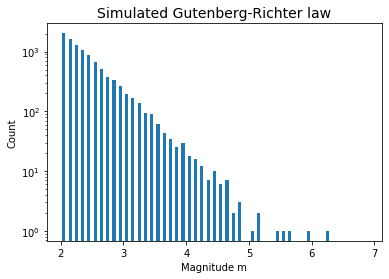

In [50]:
# Inversion method

## YOUR CODE HERE
nsim = 10000
mmin = 2
b = 1
beta = b*np.log(10)

def random_GRlaw(nsim, beta, mmin):
   u = [np.random.random() for i in range(nsim)]
   m = [(mmin - (1/beta)* np.log(1-i)) for i in u]
   return(m)

m = random_GRlaw(nsim, beta, mmin)


plt.hist(m, bins = np.arange(mmin, 7, .1), rwidth = .5)
plt.yscale('log')
plt.xlabel('Magnitude m')
plt.ylabel('Count')
plt.title('Simulated Gutenberg-Richter law', size = 14);

#### 3.2.2. Thinning Method

The time-to-failure power-law equation

$$n(t) = N_{max} (1 - t_f^{-m}(t_f-t)^m )$$

(defined such that the rate $n(0) = 0$ and $n(t_f) = N_{max}$ with power exponent $m$) represents the acceleration in number of cracks (or acoustic emissions) during material (rock or else) loading in a laboratory experiment (e.g. Turcotte et al., 2003). Such accelerations are also sometimes observed before large earthquakes making it a potential seismic precursor for earthquake prediction (e.g., Mignan, 2011).

<img src="figs_notebook/fig_LabRockCrack.png" width = 500>

The following code reproduces the algorithm defined in Lewis & Shedler (1979) and defines the time-to-failure equation from which event times are simulated:

240

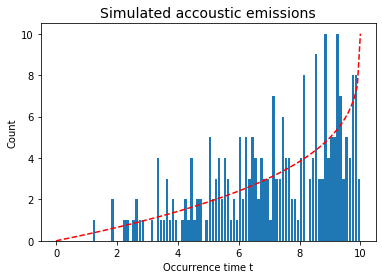

In [36]:
# thinning method
def time2failure(t, Nmax, m, tf):
    rate = Nmax * (1 - pow(tf, -m) * pow(tf - t, m))
    return(rate)

def thinning_time2failure(Nmax, m, tf):
    rate_star = Nmax                                 # maximum rate in rate function
    N_star = round(rate_star * tf)                   # max events per time bin
    t_star = np.sort(np.random.random(N_star)) * tf  # potential events to draw from
    t = []
    t.append([i for i in t_star if (np.random.random() < time2failure(i, Nmax, m, tf)/rate_star)])
    return(t)

tf, tbin = 10, .1
Nmax, m = 100, .3

t = thinning_time2failure(Nmax, m, tf)
ti = np.arange(0, tf+tbin, tbin)

plt.hist(t, bins = ti, rwidth = .8)
plt.plot(ti, time2failure(ti, Nmax, m, tf)*tbin, '--r')
plt.xlabel('Occurrence time t')
plt.ylabel('Count')
plt.title('Simulated accoustic emissions', size = 14);

np.size(t)

## 4. References

* Azzalini & Bowman (1990), A Look at Some Data on the Old Faithful Geyser, J. Royal Stat. Soc., series C, 39 (3), 357-365
* Clauset et al. (2009), Power-Law Distributions in Empirical Data, SIAM Review, 51 (4), 661-703
* Gutenberg & Richter (1944), Frequency of Earthquakes in California, Bull. Seismol. Soc. Am., 34, 185–188
* Lewis & Shedler (1979), Simulation of Nonhomogeneous Poisson Processes by Thinning, Nav. Res. Logistics Q., 26, 403–413
* Mignan (2011), Retrospective on the Accelerating Seismic Release (ASR) hypothesis: Controversy and new horizons, Tectonophysics, 505, 1-16
* Turcotte et al. (2003), Micro and macroscopic models of rock fracture, Geophys. J. Int., 152, 718-728